In [29]:
from IPython.display import HTML, display

from functools import partial

import numpy as np

from tabulate import tabulate

from KFoldCrossValidation import KFoldCrossValidation

## Primeiro Experimento
10 folds, 5 vizinhos mais próximos

In [4]:
kfold_x_validation = KFoldCrossValidation()
results = kfold_x_validation.kfold_cross_validation(
        filename="./datasets/diabetes.csv",
        k_folds=10,
        repetitions=1,
        nn=5,
        minkowski_p=2
        )

In [10]:
def round_two(num: float) -> float:
    return np.around(num, decimals=2)

In [11]:
table_data = [(idx, round_two(metrics.get("precision")), round_two(metrics.get("f1-score")))
              for idx, metrics in enumerate(results[0], 1)]

In [13]:
precisions = np.array([round_two(metrics.get("precision")) for metrics in results[0]])
f_measures = np.array([round_two(metrics.get("f1-score")) for metrics in results[0]])
mean_precision, std_precision = round_two(np.mean(precisions)), round_two(np.std(precisions))
mean_f_measure, std_f_measure = round_two(np.mean(f_measures)), round_two(np.std(f_measures))

summary_table_data = [["Média (n=10)", mean_precision, mean_f_measure],
                      ["Desvio Padrão", std_precision, std_f_measure]]

In [14]:
display(HTML(tabulate(table_data, headers=["iteration", "precision", "f1-score"], tablefmt="html")))
display(HTML(tabulate(summary_table_data, tablefmt="html")))

iteration,precision,f1-score
1,0.43,0.6
2,0.44,0.36
3,0.35,0.45
4,0.46,0.57
5,0.29,0.44
6,0.41,0.51
7,0.37,0.53
8,0.29,0.3
9,0.44,0.6
10,0.58,0.38


Média (n=10),0.41,0.47
Desvio Padrão,0.08,0.1


## Segundo Experimento
Desempenho com diferentes números de vizinhos (k=3, 5, 7)

In [46]:
kfold_x_validation = KFoldCrossValidation()
x_validation_without_nn = partial(kfold_x_validation.kfold_cross_validation,
    filename="./datasets/diabetes.csv",
    k_folds=10,
    repetitions=1,
    minkowski_p=2
)

In [47]:
three_nn = x_validation_without_nn(nn=3)
five_nn = x_validation_without_nn(nn=5)
seven_nn = x_validation_without_nn(nn=7)

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [49]:
three_nn_precision_mean = round_two(np.mean([metrics.get("precision") for metrics in three_nn[0]]))
three_nn_f1_scores_mean = round_two(np.mean([metrics.get("f1-score") for metrics in three_nn[0]]))
five_nn_precisions_mean = round_two(np.mean([metrics.get("precision") for metrics in five_nn[0]]))
five_nn_f1_scores_mean = round_two(np.mean([metrics.get("f1-score") for metrics in five_nn[0]]))
seven_nn_precisions_mean = round_two(np.mean([metrics.get("precision") for metrics in seven_nn[0]]))
seven_nn_f1_scores_mean = round_two(np.mean([metrics.get("f1-score") for metrics in seven_nn[0]]))

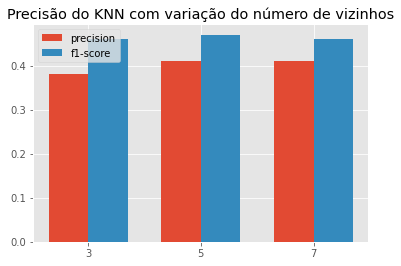

In [50]:
N = 3

precision_means = [three_nn_precision_mean, five_nn_precisions_mean, seven_nn_precisions_mean]
f1_score_means = [three_nn_f1_scores_mean, five_nn_f1_scores_mean, seven_nn_f1_scores_mean]

ind = np.arange(N)
width = 0.35
plt.bar(ind, precision_means, width, label="precision")
plt.bar(ind + width, f1_score_means, width, label="f1-score")
plt.title("Precisão do KNN com variação do número de vizinhos")

plt.xticks(ind + width / 2, ("3", "5", "7"))
plt.legend(loc="best")
plt.show()

O resultado do experimento mostra fortes indicações de que existe algum erro na implementação do modelo